In [1]:
import pandas as pd, matplotlib.pyplot as plt, os

In [2]:
data = pd.read_excel("Routes/Brooklyn_to_Flushing.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Routes/Brooklyn_to_Flushing.xlsx'

DATA Transformations

In [3]:

# Transform the "Date" column to show only "MM-DD" format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d').dt.strftime('%m-%d')

# Transform the "Time of Day" column to 12-hour format with AM/PM indication, rounded down to the nearest hour
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%H:%M:%S').dt.floor('H').dt.strftime('%I:%M %p')


In [4]:
import re

# Function to transform "Travel Time" into total minutes
def convert_travel_time_to_minutes(travel_time):
    # Initialize total minutes
    total_minutes = 0
    
    # Check for "hour" and extract hours
    hours_match = re.search(r'(\d+)\s*hour', travel_time)
    if hours_match:
        total_minutes += int(hours_match.group(1)) * 60
    
    # Check for "mins" and extract minutes
    minutes_match = re.search(r'(\d+)\s*mins', travel_time)
    if minutes_match:
        total_minutes += int(minutes_match.group(1))
    
    return total_minutes

# Apply the transformation to the "Travel Time" column
data['Travel Time'] = data['Travel Time'].apply(convert_travel_time_to_minutes)

# Remove duplicates for each "Date" and "Time of Day", keeping the last occurrence
data['Date'] = data['Date'].astype(str)  # Ensure "Date" is treated as a string
data['Time of Day'] = data['Time of Day'].astype(str)  # Ensure "Time of Day" is treated as a string

# Drop duplicate records based on "Date" and "Time of Day"
data = data.drop_duplicates(subset=['Date', 'Time of Day'], keep='last')

GRAPHING

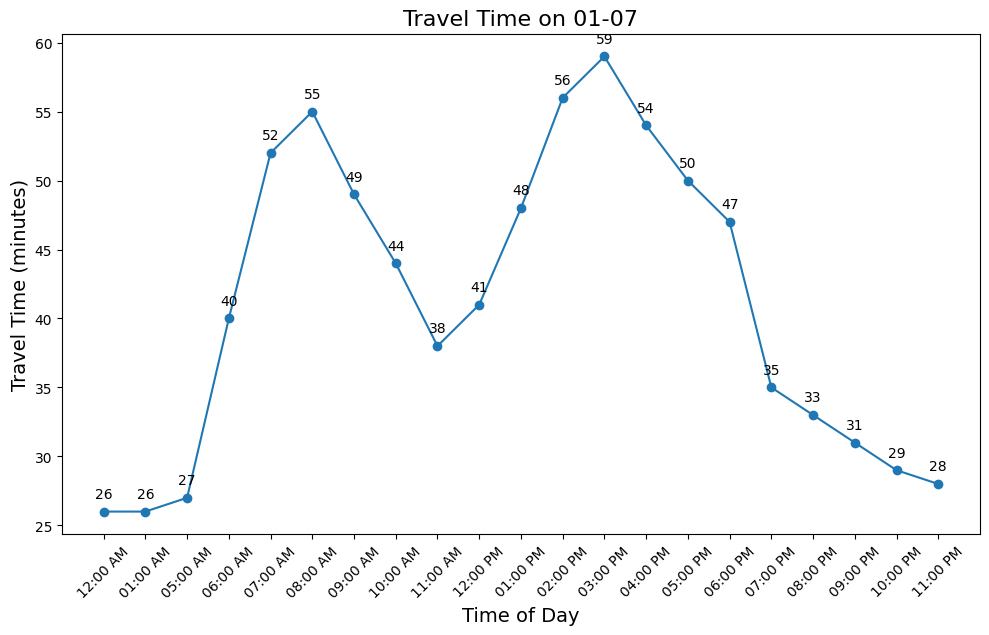

In [5]:
# Filter data for the specific date "01-07"
filtered_data = data[data['Date'] == '01-07']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Time of Day'], filtered_data['Travel Time'], marker='o', linestyle='-')

# Display y-values at every data point
for x, y in zip(filtered_data['Time of Day'], filtered_data['Travel Time']):
    plt.text(x, y+.75, f'{y}', fontsize=10, ha='center', va='bottom')

# Customize the plot
plt.title('Travel Time on 01-07', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.tight_layout()
spacing = .1
plt.subplots_adjust(bottom=spacing)
plt.show()

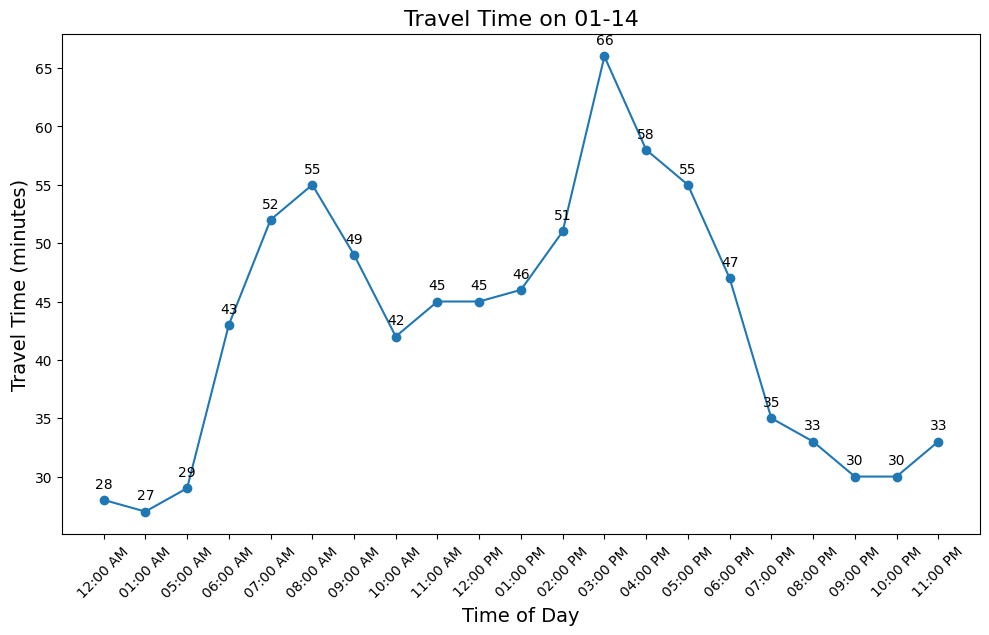

In [6]:
# Filter data for the specific date "01-14"
filtered_data = data[data['Date'] == '01-14']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Time of Day'], filtered_data['Travel Time'], marker='o', linestyle='-')

# Display y-values at every data point
for x, y in zip(filtered_data['Time of Day'], filtered_data['Travel Time']):
    plt.text(x, y+.75, f'{y}', fontsize=10, ha='center', va='bottom')

# Customize the plot
plt.title('Travel Time on 01-14', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Show the plot
plt.tight_layout()
spacing = .1
plt.subplots_adjust(bottom=spacing)
plt.show()



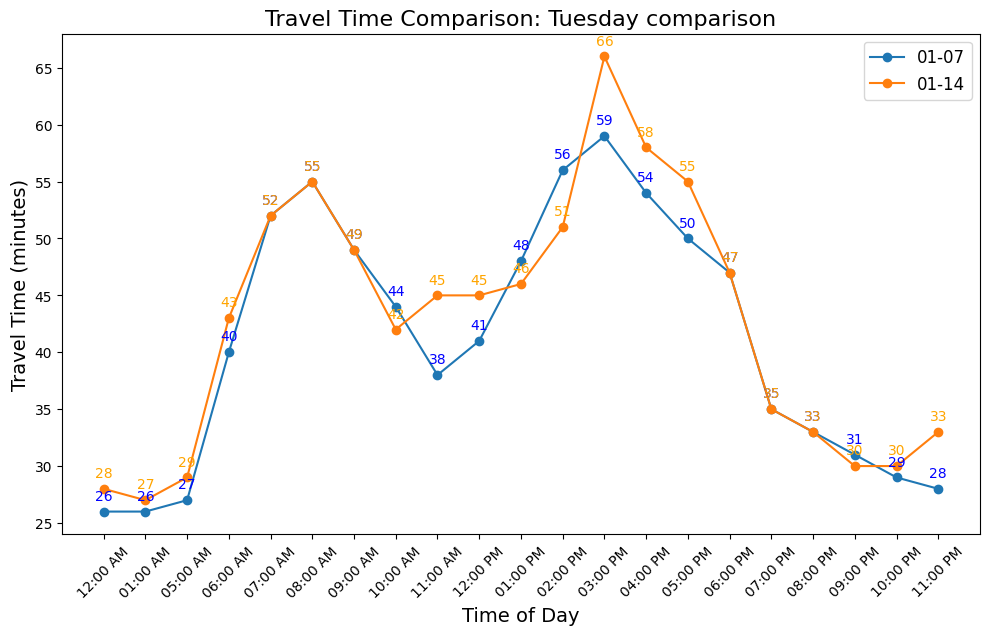

In [7]:
# Filter data for the specific dates "01-07" and "01-14"
data_01_07 = data[data['Date'] == '01-07']
data_01_14 = data[data['Date'] == '01-14']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot for 01-07
plt.plot(data_01_07['Time of Day'], data_01_07['Travel Time'], marker='o', linestyle='-', label='01-07')
for x, y in zip(data_01_07['Time of Day'], data_01_07['Travel Time']):
   plt.text(x, y + 0.75, f'{y}', fontsize=10, ha='center', va='bottom', color='blue')

# Plot for 01-14
plt.plot(data_01_14['Time of Day'], data_01_14['Travel Time'], marker='o', linestyle='-', label='01-14')
for x, y in zip(data_01_14['Time of Day'], data_01_14['Travel Time']):
   plt.text(x, y + 0.75, f'{y}', fontsize=10, ha='center', va='bottom', color='orange')

# Customize the plot
plt.title('Travel Time Comparison: Tuesday comparison', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(False)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
spacing = 0.1
plt.subplots_adjust(bottom=spacing)

# Show the plot
plt.show()


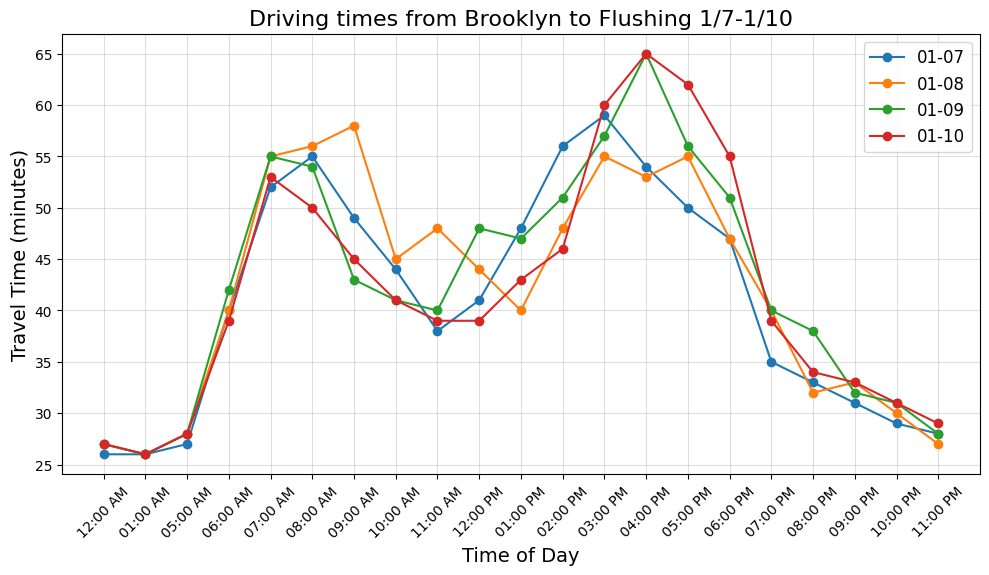

In [8]:
# Filter data for the specific dates 01-07 to 01-10
filtered_dates = ['01-07', '01-08', '01-09', '01-10']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = data_filtered[data_filtered['Date'] == date]
    plt.plot(daily_data['Time of Day'], daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving times from Brooklyn to Flushing 1/7-1/10', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(True)
plt.grid(color = 'gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


ALL WEEKDAYS ALL TIMES

Answers what time of day is the best to travel?

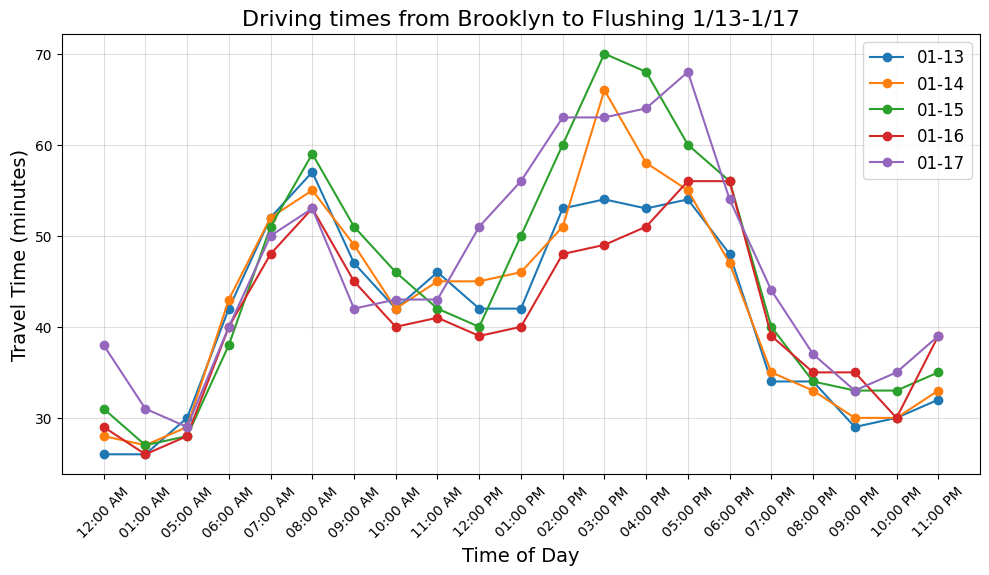

In [9]:
# Filter data for the specific dates 01-07 to 01-10
filtered_dates = ['01-13', '01-14', '01-15', '01-16','01-17']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = data_filtered[data_filtered['Date'] == date]
    plt.plot(daily_data['Time of Day'], daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving times from Brooklyn to Flushing 1/13-1/17', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(True)
plt.grid(color = 'gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


WEEKENDS

Answers what time of day is the best to travel?

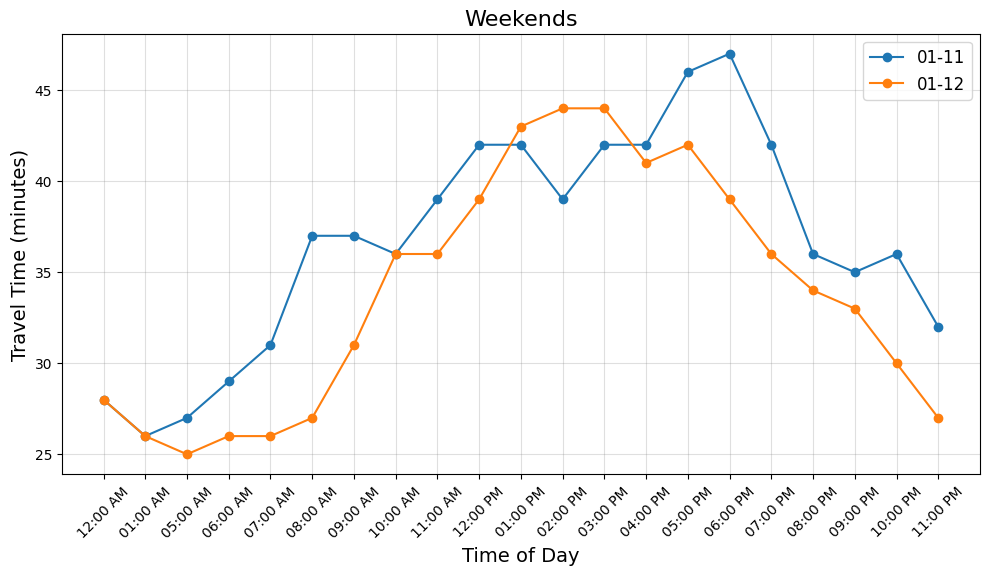

In [10]:
# Filter data for the specific dates 01-07 to 01-10
filtered_dates = ['01-11', '01-12']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = data_filtered[data_filtered['Date'] == date]
    plt.plot(daily_data['Time of Day'], daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Weekends', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Remove gridlines
plt.grid(True)
plt.grid(color = 'gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()


WEEK DAYS Only Rush Hour

In [11]:
# Convert "Time of Day" to datetime for proper filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-07', '01-08', '01-09', '01-10']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Filter the data for the specific time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Verify the number of data points per day
filtered_data['Date'] = filtered_data['Date'].astype(str)  # Ensure Date is treated as a string
grouped = filtered_data.groupby('Date')

# Check for 10 data points per day and remove excess or duplicates
valid_data = grouped.filter(lambda x: len(x) == 10)

# Recalculate total and average travel times
total_travel_time = valid_data['Travel Time'].sum()
average_travel_time = total_travel_time / 40  # Fixed divisor because we expect 50 data points

print(f"Total Travel Time: {total_travel_time} minutes")
print(f"Average Travel Time: {average_travel_time:.2f} minutes")


Total Travel Time: 2002 minutes
Average Travel Time: 50.05 minutes


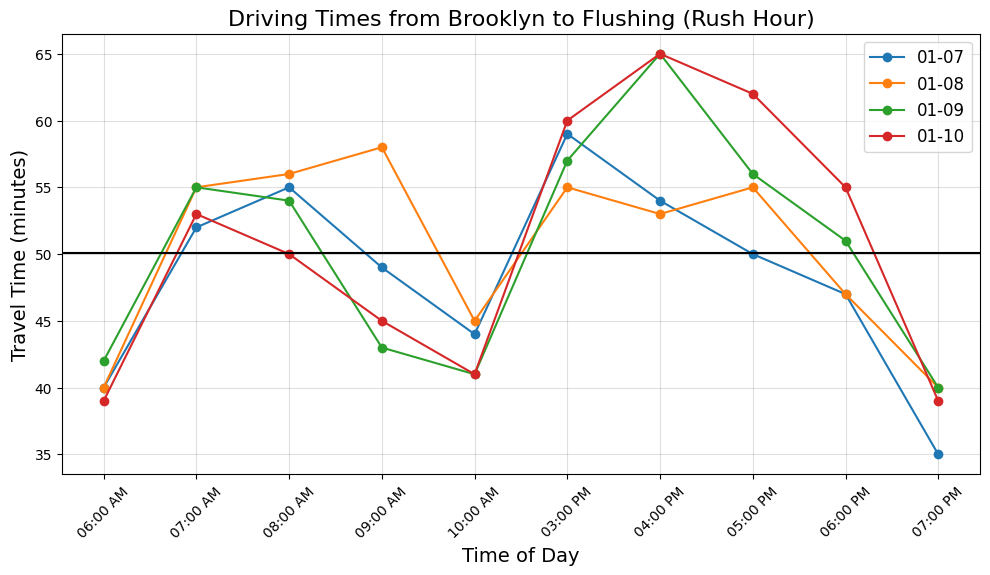

In [12]:
# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Convert "Time of Day" to datetime for filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-07', '01-08', '01-09', '01-10']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Filter data for the specified time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = filtered_data[filtered_data['Date'] == date]
    plt.plot(daily_data['Time of Day'].dt.strftime('%I:%M %p'), daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving Times from Brooklyn to Flushing (Rush Hour)', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines with custom styling
plt.grid(color='gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add a horizontal line at the average travel time
plt.axhline(y=average_travel_time, color='black', linestyle='-', label=f'Average Travel Time ({average_travel_time:.2f} min)')

# Show the plot
plt.show()
# Add a horizontal line at y = 3

In [13]:
# Convert "Time of Day" to datetime for proper filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-13', '01-14', '01-15', '01-16', '01-17']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Filter the data for the specific time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Verify the number of data points per day
filtered_data['Date'] = filtered_data['Date'].astype(str)  # Ensure Date is treated as a string
grouped = filtered_data.groupby('Date')

# Check for 10 data points per day and remove excess or duplicates
valid_data = grouped.filter(lambda x: len(x) == 10)

# Recalculate total and average travel times
total_travel_time = valid_data['Travel Time'].sum()
average_travel_time = total_travel_time / 50  # Fixed divisor because we expect 50 data points

print(f"Total Travel Time: {total_travel_time} minutes")
print(f"Average Travel Time: {average_travel_time:.2f} minutes")


Total Travel Time: 2522 minutes
Average Travel Time: 50.44 minutes


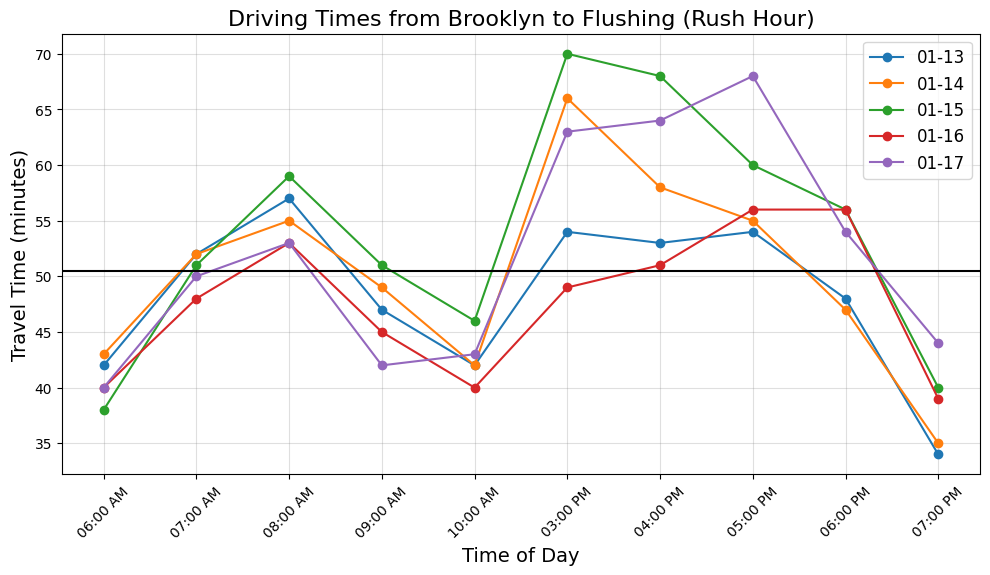

In [14]:
# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Convert "Time of Day" to datetime for filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-13', '01-14', '01-15', '01-16', '01-17']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Filter data for the specified time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = filtered_data[filtered_data['Date'] == date]
    plt.plot(daily_data['Time of Day'].dt.strftime('%I:%M %p'), daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving Times from Brooklyn to Flushing (Rush Hour)', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines with custom styling
plt.grid(color='gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add a horizontal line at the average travel time
plt.axhline(y=average_travel_time, color='black', linestyle='-', label=f'Average Travel Time ({average_travel_time:.2f} min)')

# Show the plot
plt.show()
# Add a horizontal line at y = 3



In [15]:
# Convert "Time of Day" to datetime for proper filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-20', '01-21', '01-22', '01-23', '01-24']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Filter the data for the specific time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Verify the number of data points per day
filtered_data['Date'] = filtered_data['Date'].astype(str)  # Ensure Date is treated as a string
grouped = filtered_data.groupby('Date')

# Check for 10 data points per day and remove excess or duplicates
valid_data = grouped.filter(lambda x: len(x) == 10)

# Recalculate total and average travel times
total_travel_time = valid_data['Travel Time'].sum()
average_travel_time = total_travel_time / 50  # Fixed divisor because we expect 50 data points

print(f"Total Travel Time: {total_travel_time} minutes")
print(f"Average Travel Time: {average_travel_time:.2f} minutes")

Total Travel Time: 2263 minutes
Average Travel Time: 45.26 minutes


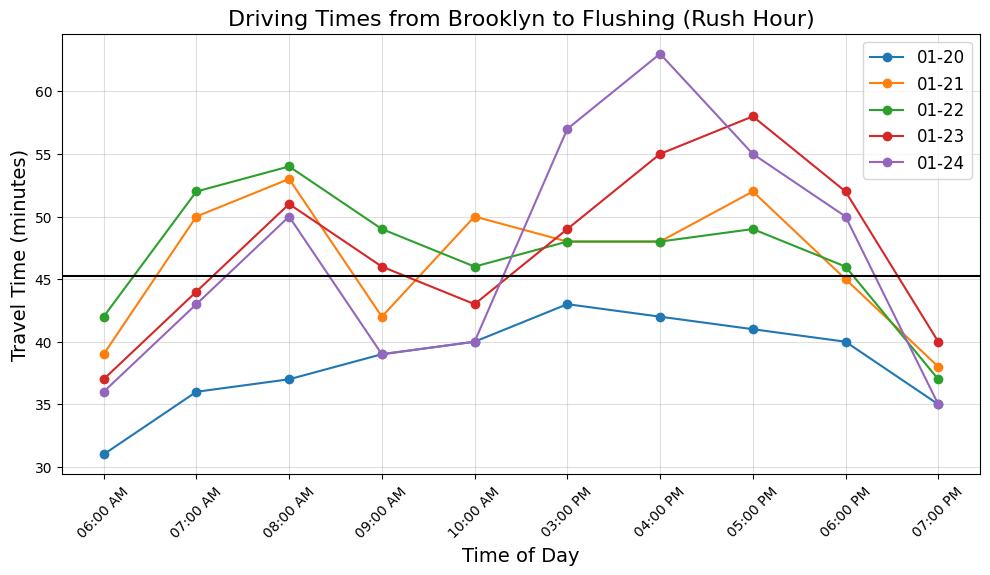

In [16]:
# Define the time ranges to filter (6 AM to 10 AM and 3 PM to 7 PM)
time_ranges = [('06:00 AM', '10:00 AM'), ('03:00 PM', '07:00 PM')]

# Convert "Time of Day" to datetime for filtering
data['Time of Day'] = pd.to_datetime(data['Time of Day'], format='%I:%M %p')

# Filter data for the specific dates 01-13 to 01-17
filtered_dates = ['01-20', '01-21', '01-22', '01-23', '01-24']
data_filtered = data[data['Date'].isin(filtered_dates)]

# Filter data for the specified time ranges
filtered_data = pd.concat([
    data_filtered[(data_filtered['Time of Day'] >= pd.to_datetime(start, format='%I:%M %p')) &
                  (data_filtered['Time of Day'] <= pd.to_datetime(end, format='%I:%M %p'))]
    for start, end in time_ranges
])

# Plot the data
plt.figure(figsize=(10, 6))

for date in filtered_dates:
    # Filter data for each specific date
    daily_data = filtered_data[filtered_data['Date'] == date]
    plt.plot(daily_data['Time of Day'].dt.strftime('%I:%M %p'), daily_data['Travel Time'], marker='o', linestyle='-', label=date)

# Customize the plot
plt.title('Driving Times from Brooklyn to Flushing (Rush Hour)', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Travel Time (minutes)', fontsize=14)
plt.xticks(rotation=45)

# Add gridlines with custom styling
plt.grid(color='gray', alpha=0.25)

# Add a legend to distinguish the lines
plt.legend(fontsize=12)

# Adjust subplot spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Add a horizontal line at the average travel time
plt.axhline(y=average_travel_time, color='black', linestyle='-', label=f'Average Travel Time ({average_travel_time:.2f} min)')

# Show the plot
plt.show()
# Add a horizontal line at y = 3



In [ ]:
from datetime import datetime, timedelta

def generate_date_range(start_date: str):
    # Define the year as a reference (leap years are not a concern for MM-DD format)
    year = "2024"  # Arbitrary leap year to handle February 29
    
    # Convert input strings to datetime objects
    start_dt = datetime.strptime(f"{year}-{start_date}", "%Y-%m-%d")
    end_dt = start_dt + timedelta(days=4)
    
    # Generate list of dates
    date_list = []
    current_dt = start_dt
    while current_dt <= end_dt:
        date_list.append(current_dt.strftime("%m-%d"))
        current_dt += timedelta(days=1)
    
    return date_list

# Get user input
start_date = input("Enter start date (MM-DD): ")

# Generate and print the list of dates
date_range = generate_date_range(start_date)
print(date_range)


In [ ]:
# Define Week 1 dates
week_1 = ['02-03', '02-04', '02-05', '02-06', '02-07']
week_2 = ['02-10', '02-11', '02-12', '02-13', '02-14']
week_3 = ['02-17', '02-18', '02-19', '02-20', '02-21']
week_4 = ['02-24', '02-25', '02-26', '02-27']

# Define the time slots we want to analyze
time_slots = ["06:00 AM", "07:00 AM", "08:00 AM", "09:00 AM", "10:00 AM",
              "03:00 PM", "04:00 PM", "05:00 PM", "06:00 PM", "07:00 PM"]

# Dictionary to store average travel times for each time slot
avg_travel_times = {}

def calculate_weekly_avg_travel_times(week_dates, data):
    avg_travel_times = {}
    for time in time_slots:
        # Filter data for the specific week and time slot
        filtered_data = data[(data['Date'].isin(week_dates)) & 
                             (data['Time of Day'].dt.time == pd.to_datetime(time, format='%I:%M %p').time())]
        
        # Calculate the average travel time for the current time slot
        if not filtered_data.empty:
            avg_travel_times[time] = filtered_data['Travel Time'].mean()
        else:
            avg_travel_times[time] = 0  # Avoid division by zero
    return avg_travel_times

# Compute averages for Week 1, Week 2, and Week 3
avg_travel_times_week_1 = calculate_weekly_avg_travel_times(week_1, data)
avg_travel_times_week_2 = calculate_weekly_avg_travel_times(week_2, data)
avg_travel_times_week_3 = calculate_weekly_avg_travel_times(week_3, data)
avg_travel_times_week_4 = calculate_weekly_avg_travel_times(week_4, data)

# Extract times and corresponding average travel times
times = list(avg_travel_times_week_1.keys())
avg_times_week_1 = list(avg_travel_times_week_1.values())
avg_times_week_2 = list(avg_travel_times_week_2.values())
avg_times_week_3 = list(avg_travel_times_week_3.values())
avg_times_week_4 = list(avg_travel_times_week_4.values())

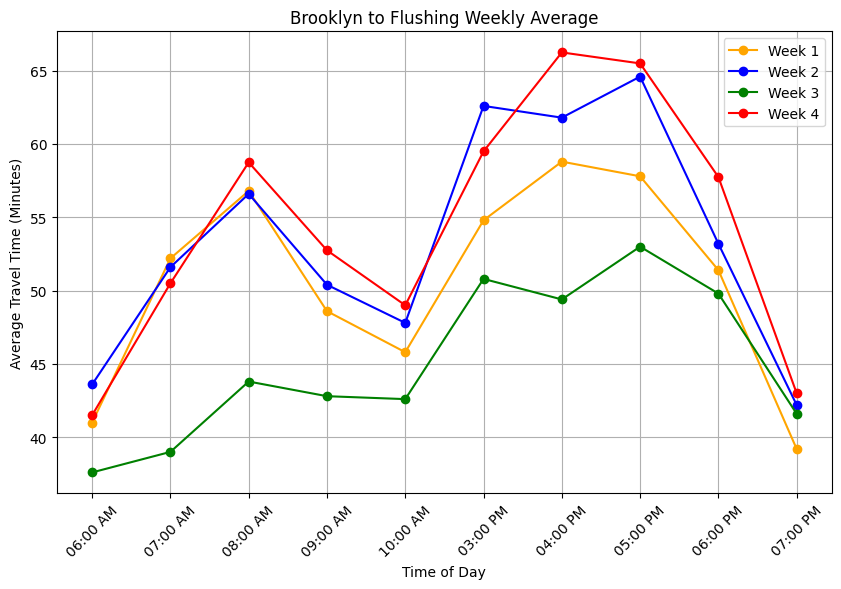

In [ ]:
# Plot the results for all three weeks
plt.figure(figsize=(10, 6))
plt.plot(times, avg_times_week_1, marker='o', linestyle='-', color='orange', label='Week 1')
plt.plot(times, avg_times_week_2, marker='o', linestyle='-', color='blue', label='Week 2')
plt.plot(times, avg_times_week_3, marker='o', linestyle='-', color='green', label='Week 3')
plt.plot(times, avg_times_week_4, marker='o', linestyle='-', color='red', label='Week 4')
# Labels and title
plt.xlabel("Time of Day")
plt.ylabel("Average Travel Time (Minutes)")
plt.title("Brooklyn to Flushing Weekly Average")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

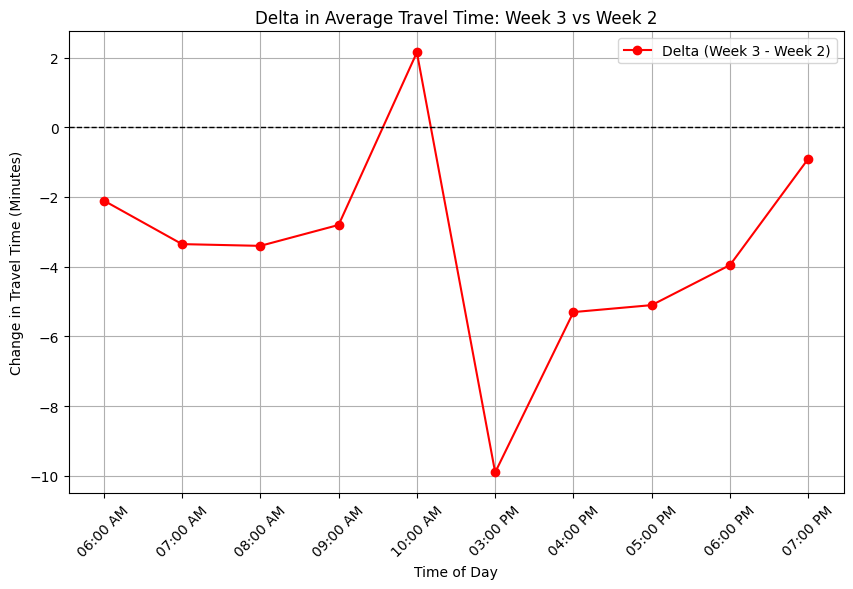

In [ ]:
# Calculate the delta (Week 3 - Week 2) for each time slot
delta_week_3_vs_week_2 = {time: avg_travel_times_week_3[time] - avg_travel_times_week_2[time] for time in time_slots}



# Convert to lists for plotting
delta_times = list(delta_week_3_vs_week_2.keys())
delta_values = list(delta_week_3_vs_week_2.values())

# Plot the delta between Week 3 and Week 2
plt.figure(figsize=(10, 6))
plt.plot(delta_times, delta_values, marker='o', linestyle='-', color='red', label='Delta (Week 3 - Week 2)')

# Labels and title
plt.xlabel("Time of Day")
plt.ylabel("Change in Travel Time (Minutes)")
plt.title("Delta in Average Travel Time: Week 3 vs Week 2")
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line at 0
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
delta_values = list(delta_week_3_vs_week_2.values())
avg_delta = sum(delta_values)/len(delta_values)
print(f"{avg_delta} minutes saved since last week")

-3.465 minutes saved since last week


In [ ]:
from datetime import datetime, timedelta

def generate_date_range(start_date: str, end_date: str):
    # Define the year as a reference (leap years are not a concern for MM-DD format)
    year = "2024"  # Arbitrary leap year to handle February 29
    
    # Convert input strings to datetime objects
    start_dt = datetime.strptime(f"{year}-{start_date}", "%Y-%m-%d")
    end_dt = datetime.strptime(f"{year}-{end_date}", "%Y-%m-%d")
    
    # Generate list of dates
    date_list = []
    current_dt = start_dt
    while current_dt <= end_dt:
        date_list.append(current_dt.strftime("%m-%d"))
        current_dt += timedelta(days=1)
    
    return date_list

# Get user input
start_date = input("Enter start date (MM-DD): ")
end_date = input("Enter end date (MM-DD): ")

# Generate and print the list of dates
date_range = generate_date_range(start_date, end_date)
print(date_range)


['02-03', '02-04', '02-05', '02-06', '02-07']
